In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
import os
from datetime import datetime, timedelta
from torch_geometric.utils import from_scipy_sparse_matrix

In [2]:
train_len = 36481
valid_len = 7817
window_len = 12 + 12 # 12 for history | 12 for future

start_ts = datetime.strptime('20170101T00:00:00', '%Y%m%dT%H:%M:%S')
timestamps = [start_ts + timedelta(minutes = 5 * train_len) + timedelta(minutes = 5 * i) for i in range(valid_len - window_len)]

num_cloudlets = 7

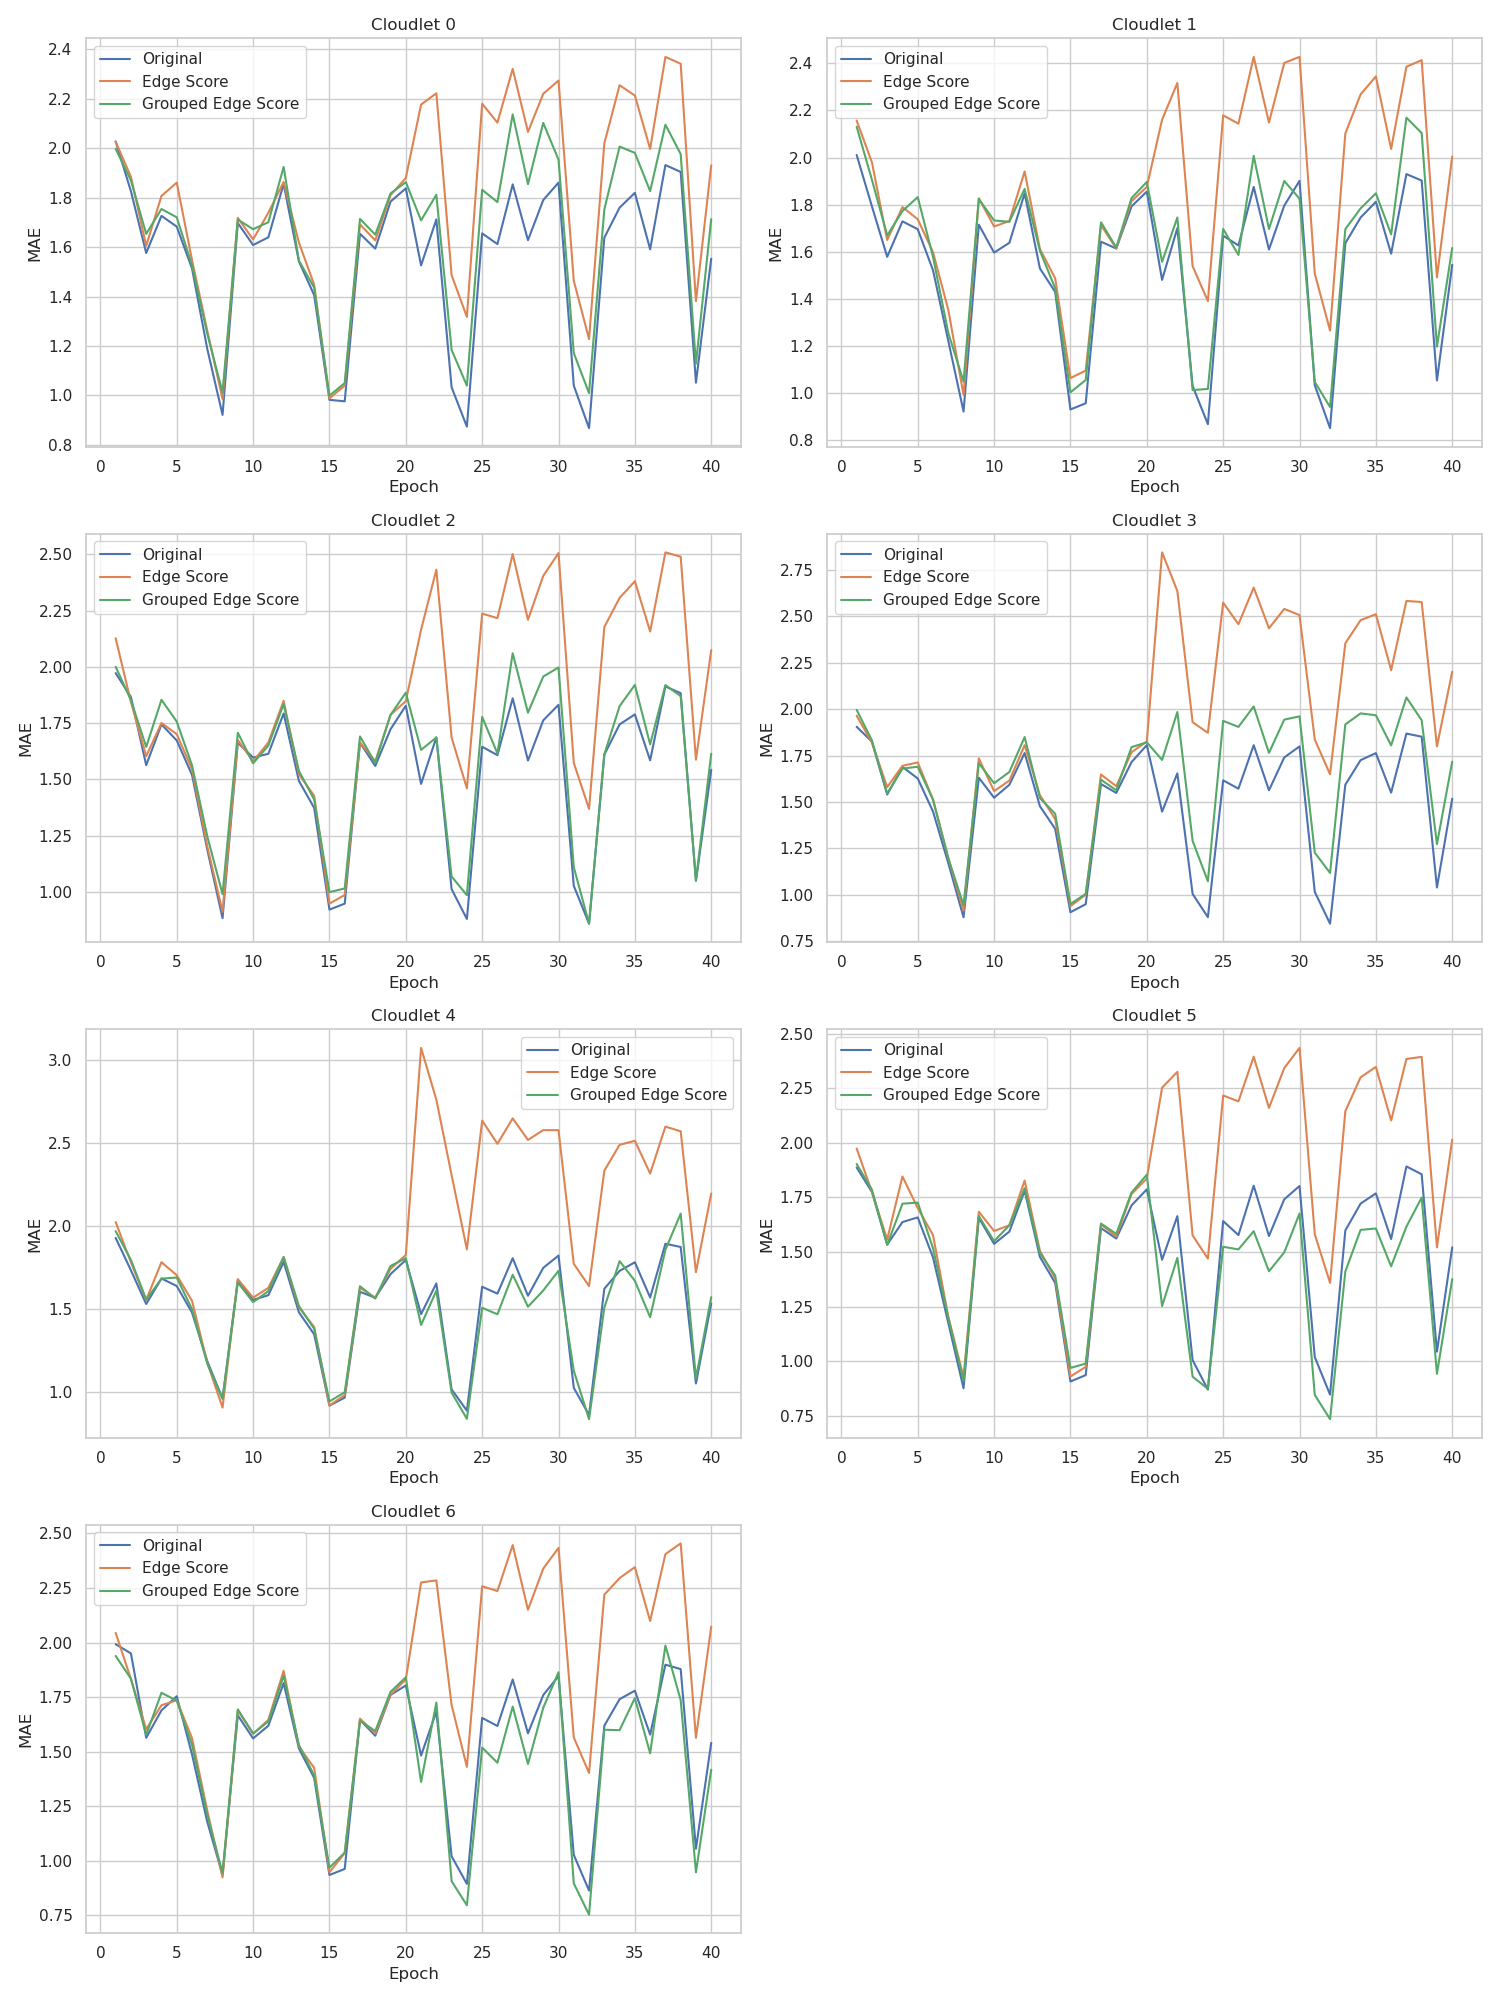

In [9]:
data_folder_original = "../logs/2025-05-23_09-27-02_pems-bay_pred-15min_his-60min_ray-semi-dec-server-free-fl-distance_online-training_with-adaptive-edge-score/val_metric/"
data_folder_edge_score = "../logs/2025-05-23_14-18-16_pems-bay_pred-15min_his-60min_ray-semi-dec-server-free-fl-distance_online-training_with-adaptive-edge-score/val_metric/"
data_folder_grouped_edge_score = "../logs/2025-05-23_11-34-14_pems-bay_pred-15min_his-60min_ray-semi-dec-server-free-fl-distance_online-training_with-adaptive-edge-score/val_metric/"

# Set seaborn style
sns.set(style="whitegrid")

# Labels for the experiments
experiment_labels = ["Original", "Edge Score", "Grouped Edge Score"]
data_folders = [data_folder_original, data_folder_edge_score, data_folder_grouped_edge_score]

# Prepare subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Read and plot data
for i in range(7):
    for folder, label in zip(data_folders, experiment_labels):
        file_path = os.path.join(folder, f"masked_{i}.csv")
        df = pd.read_csv(file_path)
        sns.lineplot(ax=axes[i], x="Epoch", y="MAE", data=df, label=label)

    axes[i].set_title(f"Cloudlet {i}")
    axes[i].legend()
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("MAE")

# Hide the 8th subplot if unused
axes[-1].axis('off')

plt.tight_layout()
plt.show()